# Support Vector Machines

A Support Vector Machine (SVM) is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, regression and even outlier detection. 

## Linear SVM Classification

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize =12)


The difference between a plain linear divided class and a SVM linear classification is that SVM will find the line that seperates the two class with the largest possible margin between the line and the instances of each class. Thats why it is called the large margin classification.

In [4]:
X = iris["data"][:,(2,3)] # petal length and width
y = iris['target']
# returns a True False array based on the argument
setosa_or_versicolor = (y==0)|(y==1)
# returns only the X rows that are True
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
y.shape

(100,)

In [5]:
from sklearn.svm import SVC
svm_clf = SVC(kernel = "linear", C = float("inf"))
svm_clf.fit(X,y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
svm_clf.intercept_[0]
svm_clf.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

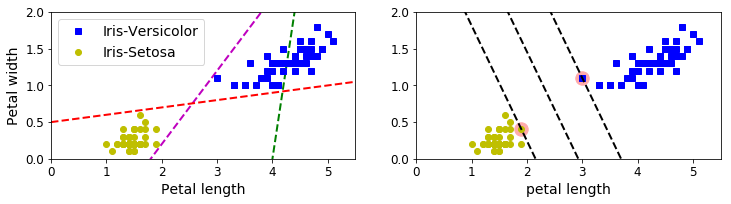

In [7]:
# Other linear models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 *x0 +.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    # At the decision boundary, w0*x0 +w1*x1+b =0
    # divides the class into positive side vs negative side
    # => x1 = -(w0*x0)/w1 - b/w1
    # we will graph x0 against x1 like the graph 
    # of petal length against petal width
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
   
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
  
    svs = svm_clf.support_vectors_
    # colors the two instances on the decision boundary
    plt.plot(x0, decision_boundary, "k--", linewidth= 2)
    plt.plot(x0, gutter_up, "k--", linewidth= 2)
    plt.plot(x0, gutter_down, "k--", linewidth = 2)
    
    plt.scatter(svs[:, 0], svs[:, 1], s = 180, facecolors = "#FFAAAA")
   

plt.figure(figsize=(12,2.7))
plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m--", linewidth=2)
plt.plot(x0, pred_3, "r--", linewidth=2)
plt.plot(X[:,0][y==1], X[:,1][y==1], 'bs', label="Iris-Versicolor")
plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo', label= "Iris-Setosa")
plt.xlabel("Petal length", fontsize = 14)
plt.ylabel("Petal width", fontsize = 14)
plt.legend(loc= "upper left", fontsize = 14)
plt.axis([0, 5.5, 0, 2]) 

plt.subplot(122)

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo')
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.xlabel("petal length", fontsize = 14)
plt.axis([0, 5.5, 0, 2])
plt.show()
    

The graph above demonstrates the large margin clasification. The SVM support vectors are actually two points on this graph that are highlighted on the margin. This model creates a line that divides the two classes with the most distance it can from both classes

### Soft Margin Classification 

Sometimes classes are not able to be so prefectly seperated

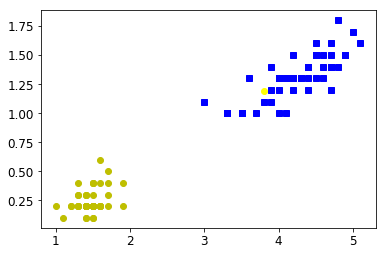

In [8]:
plt.plot(X[:,0][y==0], X[:, 1][y==0], "yo", label = "Iris-Setosa")
plt.plot(X[:,0][y==1], X[:, 1][y==1], "bs", label = "Iris-Versicolor")
plt.plot([3.8], [1.19], marker="o", markersize=6, color="yellow")
plt.show()

If we required all instances to be seperated by the decision boundary it would be called hard margin classification. But like above a linear boundary would not be possible. To avoid this we make our model more flexable. The objective is to find a good balance between keeping the margin as large as possible and limiting the margin violations. This is called soft margin classification.

In Scikit-Learn's SVM classes, you can control this balance using the C hyperparameter: a smaller C value leads to a wider margin but more margin violations.

In [9]:
X =np.append(X,[[1.5, 1.5]], axis = 0)
y= np.append(y,1)
X =np.append(X,[[3.5, .45]], axis = 0)
y =np.append(y,1)
X.shape
y.shape

(102,)

In [10]:
X =np.append(X,[[1.7, 1.5]], axis = 0)
y= np.append(y,0)
X =np.append(X,[[3.5, .75]], axis = 0)
y =np.append(y,0)

In [11]:
X =np.append(X,[[1., .5]], axis = 0)
y= np.append(y,1)
X =np.append(X,[[2.5, .5]], axis = 0)
y =np.append(y,1)

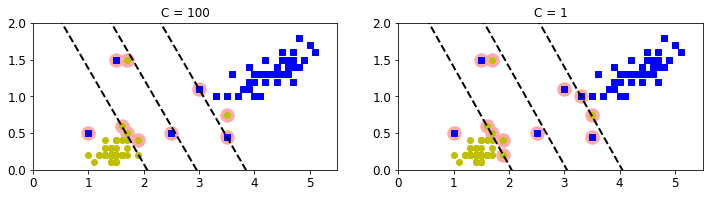

In [12]:


svm_c100_clf = SVC(kernel= "linear", C = 100)
svm_c100_clf.fit(X,y)
svm_c1_clf= SVC(kernel = "linear", C =1)
svm_c1_clf.fit(X,y)
plt.figure(figsize=(12,2.7))
plt.subplot(121)
plt.title("C = 100")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo')
plot_svc_decision_boundary(svm_c100_clf, 0, 5.5)
plt.axis([0,5.5,0,2])
plt.subplot(122)
plt.title("C = 1")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo')
plt.axis([0,5.5,0,2])
plot_svc_decision_boundary(svm_c1_clf, 0, 5.5)

Ok with this example the C=1 has more margin violations and slightly wider margin than the C=100

if your SVM model is overfitting, you can try regularizing it by reducing C

The following Scikit-learn code loads the iris dataset, scales the features and then trains a linear SVM model(using LinearSVC class with C = 1 and the hinge loss function, to detect Iris-Virginica flowers)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [14]:
X = iris["data"][:, (2,3)]
y= (iris["target"] == 2).astype(np.float64)
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss= "hinge")),
])
svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

Then as usual, you can yse the model to make predictions:
    

In [15]:
svm_clf.predict([[5.5,1.7], [ .5, .5]]) 

array([1., 0.])

Above we used the LinearSVC vs SVC(kernel= "linear", C = 1) because LinearSVC is much faster on large training set. Another option is to use the SGDClassifier(loss = "hinge", alpha = 1/(m*C)). This applies regular Stocastic Gradient Descent to train a linear SVM classifier. It is not as fast as LinearSVC but is useful for huge datasets that do not fit in memory, or handle online classification tasks

## Nonlinear Classification

Although linear SVM classifiers are efficient and work surprisingly well in many cases, many dataset are not even close to being linearly seperable. One approach to handling nonlinear datasets is to add more features, such as polynomial features. 

In [26]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 100, noise = .15, random_state = 42)
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss = "hinge", max_iter = 10000, random_state = 42))
])
polynomial_svm_clf.fit(X,y)


Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=10000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [29]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

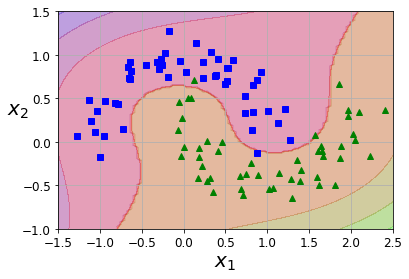

In [30]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    # to graph the area we are passing in every point in the 
    # graph this is done by creating our X below
    X = np.c_[x0.ravel(), x1.ravel()]
    # now we predict every point on the graph
    # then reshape the prediction to match the x axis
    y_pred = clf.predict(X).reshape(x0.shape)
    # decison function tells us on which side of the hyperplane generated
    # by the classifier and how far we are away from it
    y_decision = clf.decision_function(X).reshape(x0.shape)
    # this plot function takes an addition value for boarder
    plt.contourf(x0, x1, y_pred, cmap = plt.cm.brg, alpha =.1)
    plt.contourf(x0, x1, y_decision, cmap= plt.cm.brg, alpha= .3)
plot_predictions(polynomial_svm_clf, [-1.5,2.5,-1, 1.5])
plot_dataset(X,y, [-1.5, 2.5, -1, 1.5])
plt.show()

### Polynomial Kernel

Adding  polynomial features can work great with all sorts of Machine Learning algorithms, but a low polynomial degree cannot deal with very complex datasets and with a high polynomial degree a huge number of features are created making the model too slow.

Fortunately, when using SVMs you can apply a mathematical technique called the kernel trick. It makes it possible to get the same results as if you had added many polynomial features without actually having to add them. 

In [31]:
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel= "poly", degree= 3, coef0 = 1, C = 5))
])

In [32]:
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

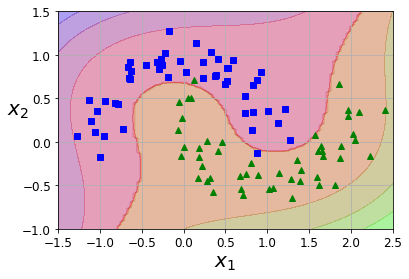

In [33]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [34]:
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel= "poly", degree= 10, coef0 = 100, C = 5))
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

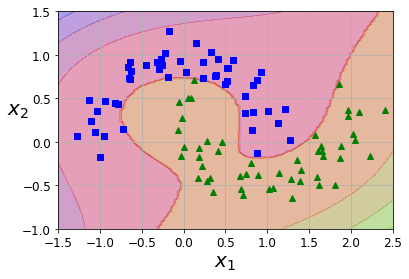

In [35]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

The second one is probably overfitting the data but it managed to encompass the different classes. Now notice that the coef0 was set to 100. This hyperparameter controls how much the model is influenced by high_degree polynomials vs low degree polynomials

In [36]:
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel= "poly", degree= 10, coef0 = 1, C = 5))
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=10, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

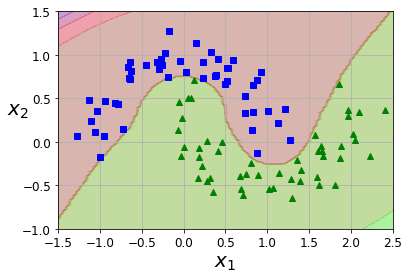

In [37]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

A common approach to find the right hyperparameter value is to use grid search. It is often faster to first do a very coarse grid search then a finer grid search around the best values.

### Adding Similarity Features

Another technique to tackle nonlinear problems is to add features computed using a similarity function that measures how much each instance resembles a particular "landmark". Okay so what does that mean. What we will do is add to "landmarks" say x1 = -2 and x1 = 1 then we will use a similarity function (in this case the Gaussion Radial Basis Function(RBF)) which will creat a bell shaped function varying for 0 (very far away from the land mark) to 1 (at the landmark). 

Gaussion RBF:
    
$\phi_{\gamma}(x, l)$ = exp (-$\gamma||x - l||^{2})$   with $\gamma$ = .3

So when you compute the two new features for the one feature instance say x1 = 1 then x2 = exp(-.3- $1^{2}$) = .74
and x3 = exp( -.3 * $2^{2}$) = .30 remembering that the squared terms are the distance from each landmark.

The simplest approach to select landmarks is to create a landmark at the location of each and every instance in the data set. This creates many dimensions and thus increases the chances that the transformed training set will be linearly seperable. 

#### Gaussian RBF Kernel

Just like the polynomial features method this can get computationally expensive quick. However there is a kernel trick to get similar results of added features without actually having to add them.

In [38]:
def rbf_kernel_svm(gamma1, C1, X, y):    
    rbf_kernel_svm_clf = Pipeline([
        
        ("scaler", StandardScaler()),
        
        ("svm_clf", SVC(kernel = "rbf", gamma = gamma1, C = C1))
    
    ])
    return rbf_kernel_svm_clf.fit(X, y)

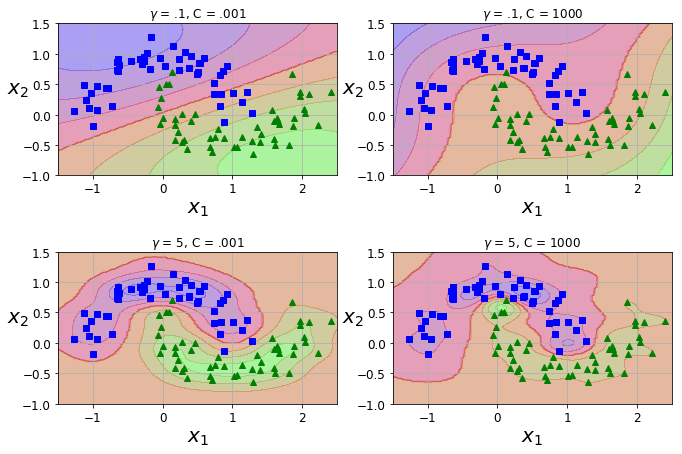

In [39]:
plt.figure(figsize = (11,7))
plt.subplot(221)
plot_predictions(rbf_kernel_svm(.1 ,.001, X, y), [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$\gamma$ = .1, C = .001")
plt.subplot(222)
plot_predictions(rbf_kernel_svm(.1, 1000, X, y), [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$\gamma$ = .1, C = 1000")
plt.subplot(223)
plot_predictions(rbf_kernel_svm(5 ,.001, X, y), [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$\gamma$ = 5, C = .001")
plt.subplot(224)
plot_predictions(rbf_kernel_svm(5, 1000, X, y), [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$\gamma$ = 5, C = 1000")
plt.subplots_adjust(hspace=.5)
plt.show()

The plots show the models trained with different $\gamma$ and C values. Increasing gamma makes the bell shape curver narrower and as a result each instance's range of influence is smaller: The decision boundary ends up being more irregular, wiggling around individual instances. Conversely a small gamma make the bell shaped curve wider, so instances have a larger range of influence. So $\gamma$ acts like a regularization hyperparameter: if your model is overfitting you should reduce it and if it is underfitting you should increase it. (Similar to the C hyperparameter.) There are kernels that are specialized for specific data structures. Examples are String kernels for classifying text documents or DNA sequences.

With so many kernels to choose from a good rule is to always try the linear kernel first, especially if the training set is very large. If the training set is not too large your should then try the Gaussion RBF kernel as well.

#### Computational Complexity


<table>
    <tr>
        <th>Class</th>
        <th>Time complexity</th>
        <th>Out-of-core support</th>
        <th>Scaling required</th>
        <th>Kernel trick</th>
    </tr>
    <tr>
        <td>LinearSVC</td>
        <td>O(m x n)</td>
        <td>No</td>
        <td>Yes</td>
        <td>No</td>
    </tr>
    <tr>
        <td>SGDClassifier</td>
        <td>O(m x n)</td>
        <td>Yes</td>
        <td>Yes</td>
        <td>No</td>
    </tr>
    <tr>
        <td>SVC</td>
        <td>O($m^{2}$ x n)to O($m^{3}$ x n)</td>
        <td>No</td>
        <td>Yes</td>
        <td>Yes</td>
    </tr>
    

## SMV Regression



SVM also support linear and nonlinear regression. The trick is to reversi the objective: instead of trying to fit the largest possible "street" between the two classes while limiting the margin violations, SVM Regression tries to fit as many instances as possible on the street while limiting the margin violations(instances of the streets). The width of the street is controlled by a hyperparameter $\epsilon$.

In [40]:
np.random.seed(42)
m= 50
X= 2* np.random.rand(m,1)
y= (4 + 3*X + np.random.randn(m,1)).ravel()

In [41]:
from sklearn.svm import LinearSVR
svm_reg1 = LinearSVR(epsilon= 1.5, random_state= 42)
svm_reg2= LinearSVR(epsilon = .5, random_state = 42)
svm_reg1.fit(X,y)
svm_reg2.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=0.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

In [42]:
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

In [43]:
# when adding a attribute to an object that is a fitted model add the 
# _ at the end to signal it is a calculated attribute
svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

In [44]:
eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

In [45]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100,1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label = r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors= "#FFAAAA")
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize = 18)
    plt.legend(loc= "upper left", fontsize = 18)
    plt.axis(axes)
    
    

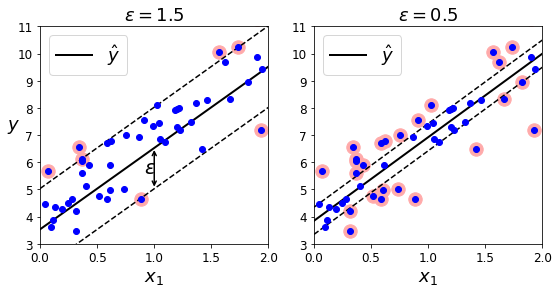

In [46]:
plt.figure(figsize = (9,4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0,2,3,11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize = 18)
plt.ylabel(r"$y$", fontsize = 18, rotation = 0)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )

plt.text(.91, 5.6, r"$\epsilon$", fontsize = 20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0,2,3,11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)

plt.show()

Adding more training instanced within the margin does not affect the model's dections thus the model is said to be $\epsilon$-insensitive. Training data shoule be scaled and centered first.

To tackle nonlinear regression tasks, you can use the kernelized SVM model.

In [55]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

In [59]:
from sklearn.svm import SVR
svm_ply_reg1= SVR(kernel = "poly", degree = 2, epsilon = .1, C = 100, gamma = "auto")
svm_ply_reg2= SVR(kernel = "poly", degree = 2, epsilon = .1, C = .01, gamma = "auto")
svm_ply_reg1.fit(X, y)
svm_ply_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

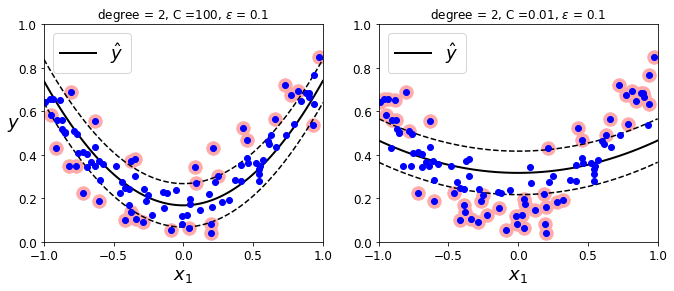

In [67]:
plt.figure(figsize = (11,4))
plt.subplot(121)
plot_svm_regression(svm_ply_reg1, X, y, [-1,1,0,1])

plt.xlabel(r"$x_{1}$", fontsize = 18)
plt.ylabel(r"$y$", fontsize = 18, rotation = 0)
plt.title("degree = 2, C =100, $\epsilon$ = 0.1", fontsize = 12)
plt.subplot(122)
plot_svm_regression(svm_ply_reg2,X, y, [-1,1,0,1])

plt.xlabel(r"$x_{1}$", fontsize = 18)

plt.title("degree = 2, C =0.01, $\epsilon$ = 0.1", fontsize = 12)
plt.show()

If your SVM is overfitting then its a good idea to decrease your C hyperparameter, and increase your C if it is underfitting.
SVMs can also be used for outlier detection.

## Under the Hood

In [73]:
X = iris["data"][:, (2,3)] # iris data of petal length and width
y = (iris["target"]== 2).astype(np.float64) # Iris Virginica


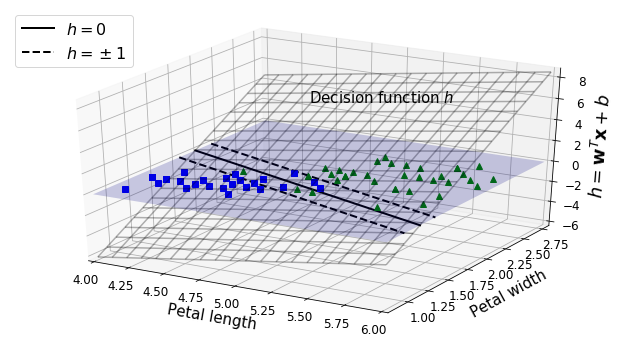

In [93]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim = [4,6], x2_lim= [0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:,0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) +b).reshape(x1.shape)
    m = 1/np.linalg.norm(w)
    # w[0]*x1s +w[1]*x2 + b = 0 
    
    
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s *(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s *(w[0]/w[1])-(b+1)/w[1] 
    ax.plot_surface(x1s,x2, np.zeros_like(x1),
                  color = "b", alpha = .2 , cstride = 100, rstride= 100)
    ax.plot(x1s, boundary_x2s, 0, "k-",linewidth= 2, label = r"$h=0$") 
    ax.plot(x1s, margin_x2s_1, 0, "k--",linewidth= 2, label = r"$h=\pm 1$") 
    ax.plot(x1s, margin_x2s_2, 0, "k--",linewidth= 2) 
    ax.plot(X_crop[:, 0][y_crop == 1],X_crop[:,1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=.3, color = "k")
    ax.plot(X_crop[:,0][y_crop==0], X_crop[:,1][y_crop==0], 0, "bs")
    ax.axis(x1_lim +x2_lim)
    ax.text(4.5,2.5,3.8, "Decision function $h$", fontsize = 15)
    ax.set_xlabel(r"Petal length", fontsize = 15, labelpad = 10)
    ax.set_ylabel(r"Petal width", fontsize = 15,labelpad = 10)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} +b$", fontsize = 18)
    ax.legend(loc= "upper left", fontsize = 16)
    
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42, max_iter = 100000) 

svm_clf2.fit(X, y)
fig = plt.figure(figsize=(11,6))
ax1 = fig.add_subplot(111, projection = "3d")
plt.subplots_adjust(hspace=.5)
plot_3D_decision_function(ax1, w= svm_clf2.coef_[0], b= svm_clf2.intercept_[0])
   

This figure shows the decision boundary(solid line) and the two margin lines, set at 1 and -1. When training a linear SVM classifier we are looking for the value of $\boldsymbol{w}$ and ${b}$ that makes the marging the waides as possible while avoiding margin violations(hard margin) or limiting them(soft margin)